# Machine Learning

In [3]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
scipy: 1.10.1
numpy: 1.24.3
pandas: 1.5.3
matplotlib: 3.7.1
sklearn: 1.2.2


In [4]:
# from sklearn import datasets
# iris = datasets.load_iris()

from sklearn.datasets import load_iris

# # Load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# dataset = read_csv(url, names=names)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

print(iris.feature_names)
print(iris.target_names)

type(X)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


numpy.ndarray

In [5]:
import pandas as pd

DFX = pd.DataFrame(X)
DFX.columns=iris.feature_names

# shape
print(DFX.shape)
# head
print(DFX.head(2))
# descriptions
print(DFX.describe())
# info
print(DFX.info())
# # class distribution
# print(DFX.groupby('class').size())

type(DFX)

(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.3000

pandas.core.frame.DataFrame

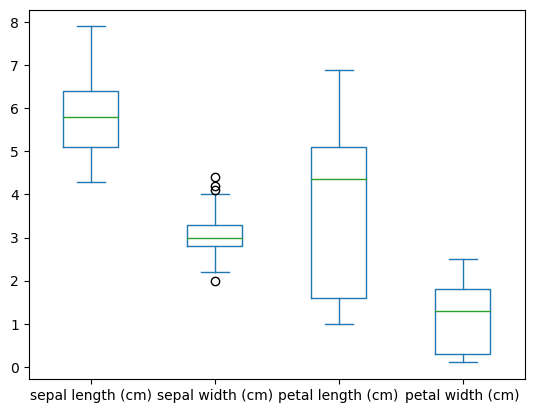

In [6]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt

# box and whisker plots
DFX.plot(kind='box', sharex=False, sharey=False)
plt.show()

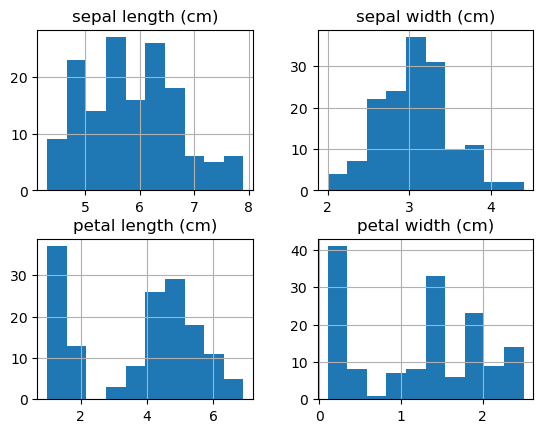

In [9]:
# histograms
DFX.hist()
plt.show()

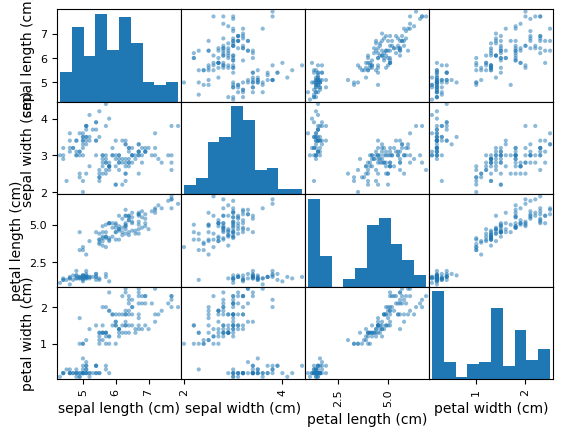

In [10]:
from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(DFX)
plt.show()

In [7]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2500)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (0.055902)
LDA: 0.966667 (0.040825)
KNN: 0.950000 (0.040825)
CART: 0.925000 (0.058333)
NB: 0.941667 (0.065085)
SVM: 0.958333 (0.041667)
MLP: 0.975000 (0.038188)
GB: 0.950000 (0.055277)
RF: 0.941667 (0.053359)


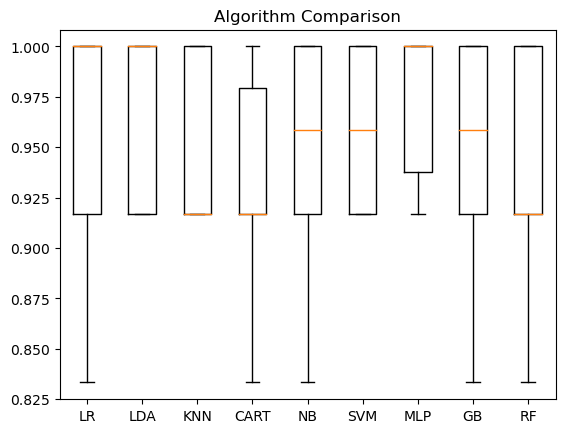

In [14]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [25]:
# Make predictions on validation dataset

# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1)  # Linear kernel for simplicity

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate predictions
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

import numpy as np
# Visualize the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Support Vector Machine (SVM) Decision Boundary')
plt.show()

Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



ValueError: X has 2 features, but SVC is expecting 4 features as input.